## Import your stuff

In [2]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

## Set up the simulator
This must have the signature `simulator(parameters, seed, args, batch)` -> `np.array([batch, ndata])`

In [3]:
JLASimulator = jla.JLA_Model()

def simulator(theta, seed, simulator_args, batch):
    
    return JLASimulator.simulation(theta, seed)

simulator_args = None
th = np.array([0.2, -0.75, -19.05, 0.125, 2.65, -0.05])
print(simulator(th, 0, simulator_args, 0).shape)

/afs/inf.ed.ac.uk/user/s18/s1832582/Thesis/pydelfi/examples/simulators/jla_supernovae/jla_parser.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype = None, names = True)


(740,)


## Set up the prior

In [3]:
lower = np.array([0, -1.5, -20, 0, 0, -0.5])
upper = np.array([0.6, 0, -18, 1, 6, 0.5])
prior = priors.Uniform(lower, upper)

## Set up the compressor
Must have the signature `compressor(data, args)` -> `np.array([n_summaries])`<br>
In this case we are going to do Gaussian score compression $$\mathbf{t} = \boldsymbol\theta_* + \mathbf{F}^{-1}\nabla_\theta^T\boldsymbol\mu_*\mathbf{C}^{-1}(\mathbf{d}-\boldsymbol\mu_*)$$ using the class `score.Gaussian`. For this we'll need some fiducial parameters, the mean its derivative at the fiducial parameters, the inverse covariance, and the inverse Fisher matrix

In [4]:
theta_fiducial = np.array([0.2, -0.75, -19.05, 0.125, 2.65, -0.05])

mu = JLASimulator.apparent_magnitude(theta_fiducial)
Cinv = JLASimulator.Cinv

h = np.array(abs(theta_fiducial))*0.01
dmudt = JLASimulator.dmudt(theta_fiducial, h)

Compressor = score.Gaussian(len(JLASimulator.data), theta_fiducial, mu = mu, Cinv = Cinv, dmudt = dmudt)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args):
    return Compressor.scoreMLE(d)
compressor_args=None

## Load in the compressed data

In [5]:
compressed_data = compressor(JLASimulator.data, compressor_args)

## Define ensemble of NDEs

In [6]:
NDEs = [ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=1, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=0),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=2, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=1),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=3, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=2),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=4, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=3),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=5, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=4),
       ndes.ConditionalMaskedAutoregressiveFlow(n_parameters=6, n_data=6, n_hiddens=[50,50], n_mades=5, act_fun=tf.tanh, index=5)]


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Create DELFI object

In [7]:
DelfiEnsemble = delfi.Delfi(compressed_data, prior, NDEs, 
                            Finv = Finv, 
                            theta_fiducial = theta_fiducial, 
                            param_limits = [lower, upper],
                            param_names = ['\\Omega_m', 'w_0', 'M_\mathrm{B}', '\\alpha', '\\beta', '\\delta M'], 
                            results_dir = "simulators/jla_supernovae/results/",
                            input_normalization="fisher")

## Fisher pre-training to initialize the NDEs

In [ ]:
DelfiEnsemble.fisher_pretraining()

## Sequential Neural Likelihood

simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint

Population 1/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



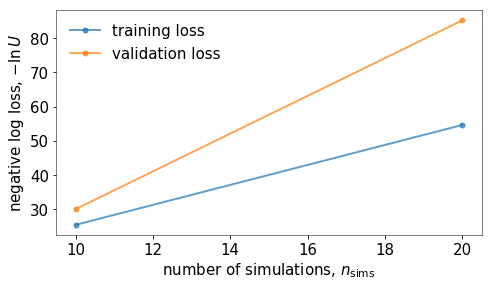

Population 2/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



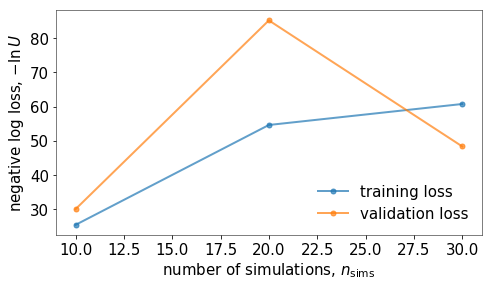

Population 3/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



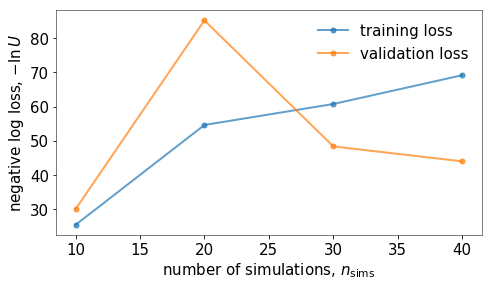

Population 4/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



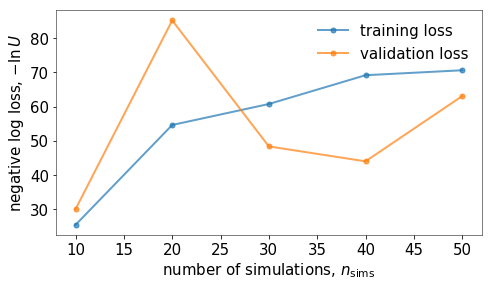

Population 5/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



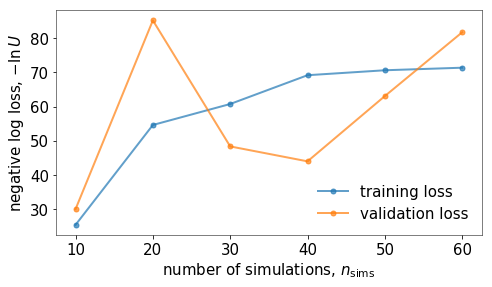

Population 6/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



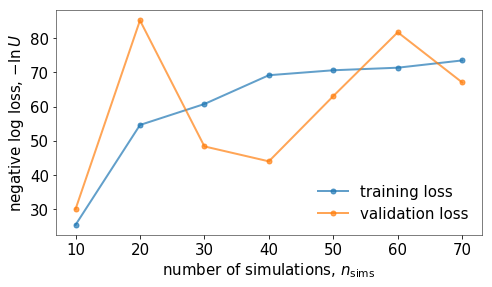

Population 7/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



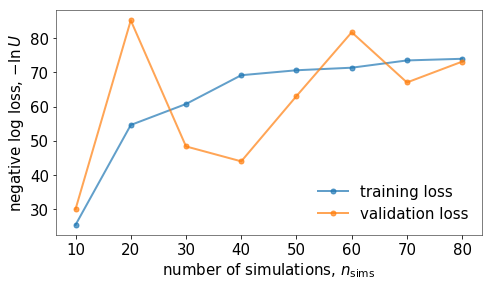

Population 8/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



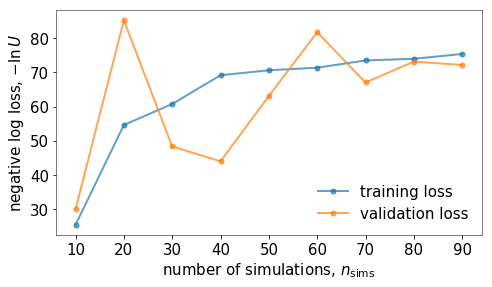

Population 9/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



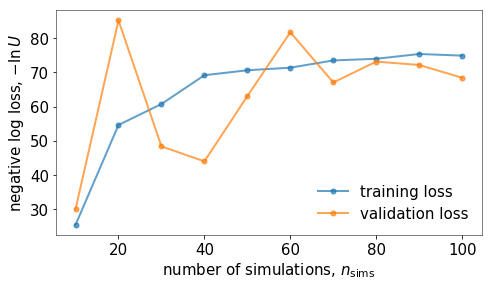

Population 10/10
Sampling proposal density...
Done.


simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint



simulators/jla_supernovae/results/graph_checkpoint


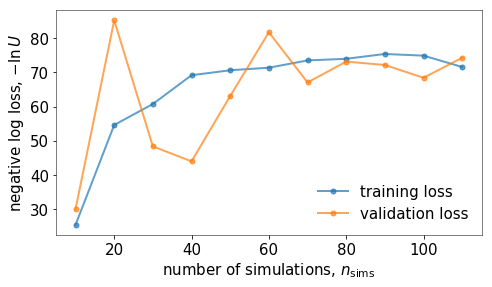

In [8]:
n_initial = 10
n_batch = 10
n_populations = 10

DelfiEnsemble.sequential_training(simulator, compressor, n_initial, n_batch, n_populations, patience=20,
                       save_intermediate_posteriors=False)

## Sample the learned posterior

In [ ]:
posterior_samples = DelfiEnsemble.emcee_sample()

## Alright let's plot it!
Feed it a list of `(n_samples, n_parameters)` arrays for making a triangle plot; in this case let's just plot the posterior samples.

In [ ]:
DelfiEnsemble.triangle_plot(samples=[posterior_samples])